In [24]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist, fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

In [25]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats


# this is our input placeholder
input_img = Input(shape=(784,))

# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['acc'])

In [26]:
from keras.datasets import fashion_mnist
import numpy as np
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [27]:
#introducing noise
noise_factor = 0.5
# test and train dataset are trained with addition of the noise factor added 
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
#fitting the model and saving it to history variable
history = autoencoder.fit(x_train_noisy, x_train, epochs=10, batch_size=256, shuffle=True, validation_data=(x_test_noisy, x_test_noisy))

Epoch 1/10
235/235 [==============================] - 4s 13ms/step - loss: 0.6980 - acc: 8.9751e-04 - val_loss: 0.6977 - val_acc: 0.0012
Epoch 2/10
235/235 [==============================] - 3s 12ms/step - loss: 0.6976 - acc: 0.0013 - val_loss: 0.6974 - val_acc: 0.0012
Epoch 3/10
235/235 [==============================] - 3s 12ms/step - loss: 0.6972 - acc: 0.0011 - val_loss: 0.6970 - val_acc: 0.0013
Epoch 4/10
235/235 [==============================] - 3s 12ms/step - loss: 0.6969 - acc: 0.0010 - val_loss: 0.6967 - val_acc: 0.0014
Epoch 5/10
235/235 [==============================] - 3s 12ms/step - loss: 0.6965 - acc: 0.0011 - val_loss: 0.6963 - val_acc: 0.0015
Epoch 6/10
235/235 [==============================] - 3s 12ms/step - loss: 0.6962 - acc: 8.9583e-04 - val_loss: 0.6960 - val_acc: 0.0014
Epoch 7/10
235/235 [==============================] - 3s 12ms/step - loss: 0.6959 - acc: 9.4694e-04 - val_loss: 0.6957 - val_acc: 0.0016
Epoch 8/10
235/235 [==============================] - 3s 

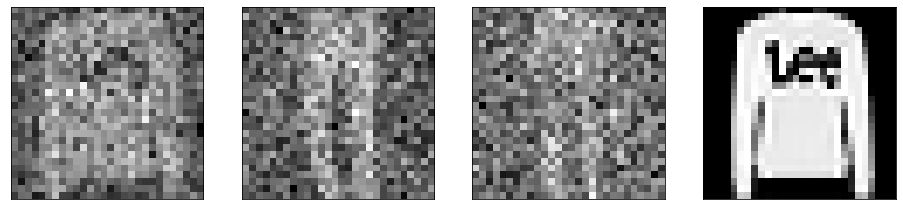

In [28]:
import keras

n =  5


plt.figure(figsize=(20, 5)) # determing the size of the output pictures

# looping through the first 5 images 
for i in range(1,n):
  # the originial images are displayed 
  axis = plt.subplot(1, n, i)
  plt.imshow(x_test_noisy[i].reshape(28,28)) # reshaping size 28 X 28 
  plt.gray()
  axis.get_xaxis().set_visible(False)
  axis.get_yaxis().set_visible(False)

X = (x_test[1].reshape(28,28)) # reshaping the test data before it can be passed 

plt.imshow(X) # looking at the results


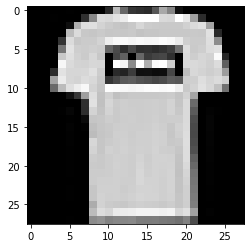

In [29]:
# visualing the train data
plt.imshow(x_train[1].reshape(28,28))
x = x_train[1].reshape(28,28)
plt.show()

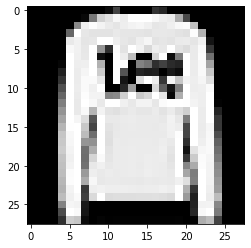

In [30]:
# visualizg the prediction
pred = x_test[1].reshape(28,28) 
plt.imshow(pred)
plt.show()


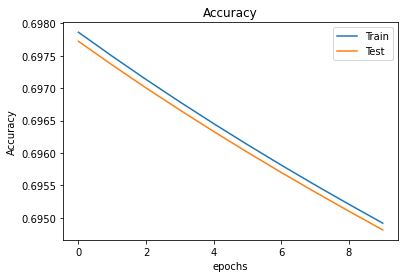

In [31]:
# plotting the graph using history function
plt.figure()
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend()
plt.show()